In [9]:
# -*- coding: utf-8 -*-
"""
Script DEFINITIVO para ktlm01.csv (La Chancla)
Extrae correctamente los datos y detecta valores negativos.
"""

import pandas as pd

# 1️⃣ Ruta del archivo
file_path = "ktlm01.csv"

# 2️⃣ Leer el CSV completo con codificación española y separador de tabulador
df_raw = pd.read_csv(file_path, sep='\t', encoding='latin-1', engine='python')

# 3️⃣ La primera fila contiene los nombres reales (Código, Descripción, etc.)
#     Así que la usamos como encabezado real:
df = pd.DataFrame(df_raw.values[1:], columns=df_raw.iloc[0])

# 4️⃣ Limpiar los encabezados (quitar espacios)
df.columns = [c.strip() for c in df.columns]

print("✅ Columnas detectadas:")
print(df.columns.tolist())

# 5️⃣ Función para convertir números con comas y comillas
def to_float(x):
    try:
        x = str(x).replace('.', '').replace(',', '.').replace('"', '').strip()
        return float(x)
    except:
        return None

# 6️⃣ Columnas numéricas
numeric_cols = [
    "Unidades",
    "Importe Total",
    "Importe Total I.I.",
    "% Venta",
    "% Acumu.",
    "Beneficio B.I.",
    "% Ben."
]

# 7️⃣ Aplicar conversión solo si las columnas existen
for col in numeric_cols:
    if col in df.columns:
        df[col] = df[col].apply(to_float)
    else:
        print(f"⚠️ La columna '{col}' no está en el CSV (quizás cambió el nombre).")

# 8️⃣ Buscar filas con cualquier valor negativo
cols_existentes = [c for c in numeric_cols if c in df.columns]
negativos = df[(df[cols_existentes] < 0).any(axis=1)]

# 9️⃣ Mostrar resultados
print("\n=== FILAS CON VALORES NEGATIVOS DETECTADAS ===")
if not negativos.empty:
    display(negativos[["Código", "Descripción"] + cols_existentes])
    total_neg = negativos["Importe Total"].sum()
    print(f"\n🔻 Total negativo detectado: {total_neg:,.2f} €")
else:
    print("✅ No se han detectado valores negativos.")

# 🔟 Guardar los negativos en CSV nuevo
negativos.to_csv("lineas_negativas_ABC.csv", index=False, encoding='utf-8')
print("\n📁 Archivo 'lineas_negativas_ABC.csv' creado correctamente.")



✅ Columnas detectadas:
['Código', 'Descripción', 'Unidades', 'Importe Total', 'Importe Total  I.I.', '% Venta', '% Acumu.', 'Fecha Ult.Vta.', 'Beneficio B.I.', '% Ben.']
⚠️ La columna 'Importe Total I.I.' no está en el CSV (quizás cambió el nombre).

=== FILAS CON VALORES NEGATIVOS DETECTADAS ===


,Código,Descripción,Unidades,Importe Total,% Venta,% Acumu.,Beneficio B.I.,% Ben.
127,000011,NESTEA LIMÓN,831.0,1699.55,0.17,85.85,-57230.45,-3367.4
583,001400,DESCUENTOS,197.0,-776.90,-0.08,100.19,-776.90,100.0
584,ç,NaN,370.0,-1904.55,-0.19,100.00,-1904.55,100.0



🔻 Total negativo detectado: -981.90 €

📁 Archivo 'lineas_negativas_ABC.csv' creado correctamente.


In [10]:
import pandas as pd

# Leer solo las primeras líneas del CSV para detectar el rango de fechas
file_path = "ktlm01.csv"

# Leemos las primeras dos filas sin tocar nada
df_preview = pd.read_csv(file_path, sep='\t', encoding='latin-1', nrows=2, engine='python')

# Mostrar el texto de la primera celda (donde viene el rango)
texto = df_preview.columns[0]
print("🗓️ Rango de fechas detectado en el ABC:")
print(texto)


🗓️ Rango de fechas detectado en el ABC:
ABC de Ventas     Del 01/01/2025 al 30/09/2025


In [11]:
import pandas as pd

# 1. Leer el archivo ABC (ya sabes que es Latin-1 y tabulado)
file_path = "ktlm01.csv"
df_raw = pd.read_csv(file_path, sep='\t', encoding='latin-1', engine='python')

# 2. Usar la segunda fila como encabezado real (la primera son títulos del informe)
df = pd.DataFrame(df_raw.values[1:], columns=df_raw.iloc[0])
df.columns = [c.strip() for c in df.columns]

# 3. Convertir las columnas numéricas a float
def to_float(x):
    try:
        x = str(x).replace('.', '').replace(',', '.').replace('"', '').strip()
        return float(x)
    except:
        return None

df["Unidades"] = df["Unidades"].apply(to_float)
df["Importe Total"] = df["Importe Total"].apply(to_float)

# 4. Eliminar filas vacías o sin descripción
df = df.dropna(subset=["Descripción"])

# 5. Ordenar por UNIDADES vendidas (de mayor a menor)
top_unidades = df.sort_values(by="Unidades", ascending=False).head(10)

# 6. Ordenar por IMPORTE TOTAL (de mayor a menor)
top_importe = df.sort_values(by="Importe Total", ascending=False).head(10)

# 7. Mostrar resultados
print("📦 Top 10 productos por unidades vendidas:")
display(top_unidades[["Código", "Descripción", "Unidades", "Importe Total"]])

print("💰 Top 10 productos por importe total:")
display(top_importe[["Código", "Descripción", "Unidades", "Importe Total"]])


📦 Top 10 productos por unidades vendidas:


,Código,Descripción,Unidades,Importe Total
1,000149,CAFÉ CON LECHE,19151.0,39653.73
2,000754,CAÑITA 5 ESTRELLAS,11494.0,26956.27
64,001505,ACEITE,9899.0,4480.45
0,000211,HAMACA,8814.0,50943.80
10,001792,Bot. Agua Solan 50cl,8734.0,16629.32
78,001507,EMULSION TOMATE,7712.0,3483.64
4,000129,MAHOU 33CL,7082.0,20278.41
26,001488,MULTICEREAL,6795.0,9805.09
37,001487,RUSTICO,5983.0,8108.18
16,001791,Bot. Agua Solan Con Gas 33cl,5576.0,12181.82


💰 Top 10 productos por importe total:


,Código,Descripción,Unidades,Importe Total
0,000211,HAMACA,8814.0,50943.80
1,000149,CAFÉ CON LECHE,19151.0,39653.73
2,000754,CAÑITA 5 ESTRELLAS,11494.0,26956.27
3,000109,BURGUER LA CHANCLA,1655.0,20693.45
4,000129,MAHOU 33CL,7082.0,20278.41
5,000755,JARRA 5 ESTRELLAS,5012.0,19599.14
6,001849,SOMBRILLA,4330.0,17880.17
7,000727,WOK POLLO,1427.0,17194.00
8,001805,PESCADO PLANCHA,1214.0,17077.55
9,001663,ALHAMBRA 1925,5154.0,16921.09


In [13]:
import pandas as pd

# Leer tu archivo ABC (ajusta el nombre si es distinto)
file_path = "ktlm01.csv"

# Leer las primeras filas para no cargar todo
df_raw = pd.read_csv(file_path, sep='\t', encoding='latin-1', engine='python')

# Usar la segunda fila como encabezado real
df = pd.DataFrame(df_raw.values[1:], columns=df_raw.iloc[0])

# Mostrar los nombres de las columnas
print("🧾 Columnas reales en tu archivo ABC:\n")
for i, c in enumerate(df.columns):
    print(f"{i+1}. {c}")


🧾 Columnas reales en tu archivo ABC:

1. Código
2. Descripción
3. Unidades
4. Importe Total
5. Importe Total  I.I.
6. % Venta
7. % Acumu.
8. Fecha Ult.Vta.
9. Beneficio B.I.
10. % Ben.


In [17]:
import pandas as pd

# 1️⃣ Leer el archivo de mayo
df_raw = pd.read_csv("mayo.csv", sep='\t', encoding='latin-1', engine='python')

# 2️⃣ Usar la segunda fila como encabezado real
df = pd.DataFrame(df_raw.values[1:], columns=df_raw.iloc[0])
df.columns = [c.strip() for c in df.columns]

# 3️⃣ Función para convertir a número
def to_float(x):
    try:
        x = str(x).replace('.', '').replace(',', '.').replace('"', '').strip()
        return float(x)
    except:
        return None

df["Unidades"] = df["Unidades"].apply(to_float)
df["Importe Total"] = df["Importe Total"].apply(to_float)

# 4️⃣ Normalizar la descripción (mayúsculas y sin espacios)
df["Descripción_normalizada"] = df["Descripción"].astype(str).str.upper().str.strip()

# 5️⃣ Lista de productos de playa deseados
productos_deseados = [
    "HAMACA",
    "SOMBRILLA",
    "CAMA 1 DIA",
    "CAMA 1/2 DIA"
]

# 6️⃣ Filtrar solo los productos deseados
df_playa = df[df["Descripción_normalizada"].isin(productos_deseados)].copy()

# 7️⃣ Agrupar y ordenar resultados
resumen = (
    df_playa.groupby("Descripción", as_index=False)
    .agg({"Unidades": "sum", "Importe Total": "sum"})
    .sort_values(by="Importe Total", ascending=False)
)

# 8️⃣ Mostrar resultado
print("📊 Productos de playa - Mes de mayo (solo 4 productos seleccionados):")
display(resumen)

# 9️⃣ Guardar el resumen
resumen.to_excel("resumen_mayo_playa_4.xlsx", index=False)
print("\n✅ Archivo 'resumen_mayo_playa_4.xlsx' creado correctamente.")


📊 Productos de playa - Mes de mayo (solo 4 productos seleccionados):


,Descripción,Unidades,Importe Total
2,HAMACA,1163.0,6728.10
3,SOMBRILLA,565.0,2334.71
0,CAMA 1 DIA,36.0,1041.32
1,CAMA 1/2 DIA,18.0,416.53



✅ Archivo 'resumen_mayo_playa_4.xlsx' creado correctamente.


📊 Resumen mensual de productos de playa:


,Mes,Descripción_normalizada,Unidades,Importe Total
0,Agosto,CAMA 1 DIA,162.0,4685.95
1,Agosto,CAMA 1/2 DIA,64.0,1411.57
2,Agosto,HAMACA,2183.0,12594.21
3,Agosto,SOMBRILLA,1077.0,4438.02
4,Julio,CAMA 1 DIA,160.0,4628.10
5,Julio,CAMA 1/2 DIA,57.0,1319.01
6,Julio,HAMACA,1995.0,11541.32
7,Julio,SOMBRILLA,998.0,4123.97
8,Junio,CAMA 1 DIA,98.0,2834.71
9,Junio,CAMA 1/2 DIA,49.0,1133.88



✅ Archivo 'historico_playa_mayo_septiembre.xlsx' creado correctamente.


C:\Users\sgcov\AppData\Local\Temp\ipykernel_13996\2263568264.py:91: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\sgcov\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


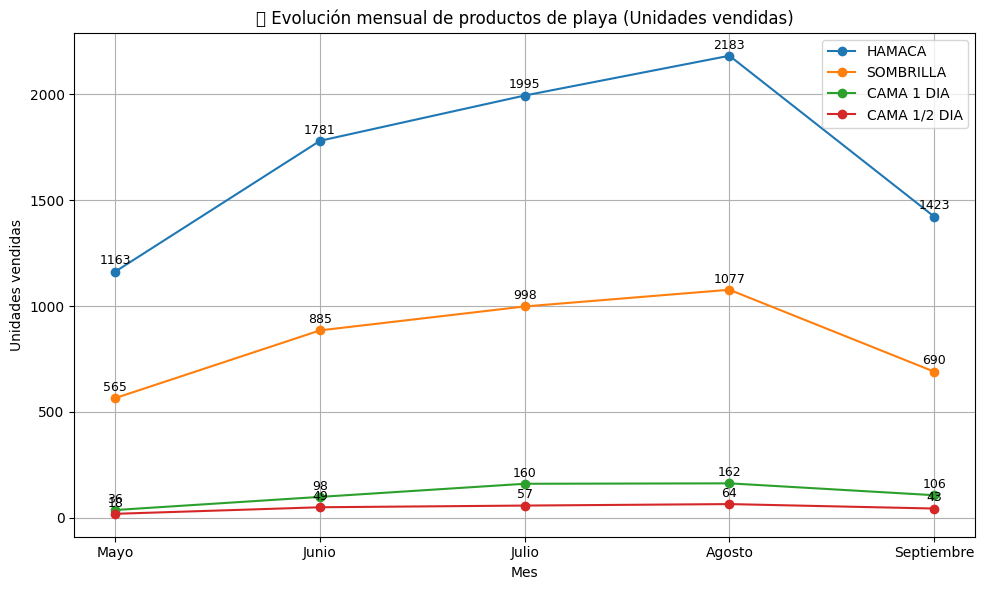

In [20]:
import pandas as pd
import glob
import matplotlib.pyplot as plt

# 1️⃣ Buscar todos los CSV del directorio actual (mayo, junio, julio, etc.)
archivos = sorted(glob.glob("*.csv"))

# 2️⃣ Crear un DataFrame vacío
historico = pd.DataFrame()

# 3️⃣ Función para limpiar números
def to_float(x):
    try:
        x = str(x).replace('.', '').replace(',', '.').replace('"', '').strip()
        return float(x)
    except:
        return None

# 4️⃣ Lista de productos que quieres analizar
productos_deseados = [
    "HAMACA",
    "SOMBRILLA",
    "CAMA 1 DIA",
    "CAMA 1/2 DIA"
]

# 5️⃣ Procesar cada archivo mensual
for archivo in archivos:
    mes = archivo.replace(".csv", "").capitalize()  # ej. "Mayo"
    
    # Leer el CSV
    df_raw = pd.read_csv(archivo, sep='\t', encoding='latin-1', engine='python')
    df = pd.DataFrame(df_raw.values[1:], columns=df_raw.iloc[0])
    df.columns = [c.strip() for c in df.columns]
    
    # Limpiar datos
    df["Descripción_normalizada"] = df["Descripción"].astype(str).str.upper().str.strip()
    df["Unidades"] = df["Unidades"].apply(to_float)
    df["Importe Total"] = df["Importe Total"].apply(to_float)
    
    # Filtrar solo los productos deseados
    df_filtrado = df[df["Descripción_normalizada"].isin(productos_deseados)].copy()
    df_filtrado["Mes"] = mes
    
    # Guardar en histórico
    historico = pd.concat([historico, df_filtrado], ignore_index=True)

# 6️⃣ Crear resumen mensual (agrupado por Mes y Descripción)
resumen = (
    historico.groupby(["Mes", "Descripción_normalizada"], as_index=False)
    .agg({"Unidades": "sum", "Importe Total": "sum"})
)

# 7️⃣ Mostrar resumen completo
print("📊 Resumen mensual de productos de playa:")
display(resumen)

# 8️⃣ Guardar en Excel
resumen.to_excel("historico_playa_mayo_septiembre.xlsx", index=False)
print("\n✅ Archivo 'historico_playa_mayo_septiembre.xlsx' creado correctamente.")

# 9️⃣ Crear gráfico conjunto
import matplotlib.pyplot as plt

# Orden correcto de los meses
orden_meses = ["Mayo", "Junio", "Julio", "Agosto", "Septiembre"]

# Asegurar el orden cronológico
resumen["Mes"] = pd.Categorical(resumen["Mes"], categories=orden_meses, ordered=True)
resumen = resumen.sort_values("Mes")

# Crear gráfico
plt.figure(figsize=(10, 6))

for producto in productos_deseados:
    datos = resumen[resumen["Descripción_normalizada"] == producto]
    plt.plot(datos["Mes"], datos["Unidades"], marker='o', label=producto)
    
    # Añadir etiquetas encima de cada punto
    for i, row in datos.iterrows():
        plt.text(row["Mes"], row["Unidades"] + 20,   # +20 para separarlo visualmente del punto
                 f'{int(row["Unidades"])}', 
                 ha='center', va='bottom', fontsize=9, color='black')

# Decorar el gráfico
plt.title("📈 Evolución mensual de productos de playa (Unidades vendidas)")
plt.xlabel("Mes")
plt.ylabel("Unidades vendidas")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



In [24]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

# Paleta de colores por mes
colores_meses = {
    "Mayo": "#D0E3FA",
    "Junio": "#D9FAD0",
    "Julio": "#FFF5B8",
    "Agosto": "#FFD9B8",
    "Septiembre": "#E7C6FF"
}

# Crear el PDF
with PdfPages("informe_playa_colores_FINAL.pdf") as pdf:
    
    # === PÁGINA 1: TABLA CON COLORES ===
    fig, ax = plt.subplots(figsize=(10, 4))
    ax.axis('off')

    orden_meses = ["Mayo", "Junio", "Julio", "Agosto", "Septiembre"]
    resumen["Mes"] = pd.Categorical(resumen["Mes"], categories=orden_meses, ordered=True)
    resumen = resumen.sort_values(["Mes", "Descripción_normalizada"])

    # Crear tabla
    tabla = ax.table(
        cellText=resumen.round(2).values,
        colLabels=resumen.columns,
        cellLoc='center',
        loc='center'
    )

    # Colorear filas por mes
    for i, mes in enumerate(resumen["Mes"]):
        color = colores_meses.get(mes, "#FFFFFF")
        for j in range(len(resumen.columns)):
            tabla[(i+1, j)].set_facecolor(color)

    # Ajustes visuales
    tabla.auto_set_font_size(False)
    tabla.set_fontsize(8)
    tabla.scale(1.2, 1.2)

    # 🔹 TÍTULO ARRIBA, CENTRADO Y FUERA DE LA TABLA
    fig.text(
        0.5, 1.02,  # posición (x, y)
        "📊 Informe de Ventas — Productos de Playa (Mayo a Septiembre 2025)",
        ha='center', va='bottom',
        fontsize=13, fontweight='bold'
    )

    # 🔸 Añadir subtítulo opcional
    fig.text(
        0.5, 0.97,
        "Periodo analizado: mayo–septiembre 2025 | Fuente: TPV OfiBar",
        ha='center', va='bottom', fontsize=9, color='gray'
    )

    # Aumentar margen superior para no recortar el título
    plt.subplots_adjust(top=0.8)

    # Guardar sin recortar el margen superior
    pdf.savefig(fig)
    plt.close(fig)

    # === PÁGINA 2: GRÁFICO ===
    fig, ax = plt.subplots(figsize=(10, 6))
    for producto in productos_deseados:
        datos = resumen[resumen["Descripción_normalizada"] == producto]
        ax.plot(datos["Mes"], datos["Unidades"], marker='o', label=producto)
        for i, row in datos.iterrows():
            ax.text(row["Mes"], row["Unidades"] + 20, f'{int(row["Unidades"])}',
                    ha='center', va='bottom', fontsize=8, color='black')

    ax.set_title("📈 Evolución mensual de unidades vendidas", fontsize=12, pad=10)
    ax.set_xlabel("Mes")
    ax.set_ylabel("Unidades")
    ax.legend()
    ax.grid(True)
    pdf.savefig(fig, bbox_inches='tight')
    plt.close(fig)

print("✅ PDF 'informe_playa_colores_FINAL.pdf' creado con título separado y márgenes correctos.")


C:\Users\sgcov\AppData\Local\Temp\ipykernel_13996\3289543056.py:62: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  pdf.savefig(fig)
C:\Users\sgcov\AppData\Local\Temp\ipykernel_13996\3289543056.py:79: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  pdf.savefig(fig, bbox_inches='tight')


✅ PDF 'informe_playa_colores_FINAL.pdf' creado con título separado y márgenes correctos.
